In [7]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv('groceries.csv', header=None)

In [3]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_np = df.to_numpy()
df_np

array([['citrus fruit', 'semi-finished bread', 'margarine', ..., nan,
        nan, nan],
       ['tropical fruit', 'yogurt', 'coffee', ..., nan, nan, nan],
       ['whole milk', nan, nan, ..., nan, nan, nan],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., nan, nan,
        nan],
       ['semi-finished bread', 'bottled water', 'soda', ..., nan, nan,
        nan],
       ['chicken', 'tropical fruit', 'other vegetables', ..., nan, nan,
        nan]], dtype=object)

In [8]:
basket = []

for row in df_np:
    tmp = []
    for ele in row:
        if ele is not np.nan:
            tmp.append(ele)
    basket.append(tmp)

In [9]:
basket

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [10]:
from mlxtend.preprocessing import TransactionEncoder

In [11]:
te = TransactionEncoder()
basket = te.fit(basket).transform(basket)
basket

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [12]:
basket.astype("int")

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
te.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'baby food',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen me

In [14]:
basket = pd.DataFrame(basket, columns=te.columns_)
basket = basket.replace({True : 1, False : 0})
basket

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori

In [15]:
import time
startTime, endTime = 0, 0

In [16]:
Time_Apr, Time_FPG = [], []

In [17]:
#min_sup = 0.01
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.01, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.3125 seconds


,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
5,0.080529,(bottled beer)
6,0.110524,(bottled water)
7,0.064870,(brown bread)
8,0.055414,(butter)
9,0.027961,(butter milk)


In [18]:
#min_sup = 0.02
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.02, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.125 seconds


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
5,0.110524,(bottled water)
6,0.064870,(brown bread)
7,0.055414,(butter)
8,0.027961,(butter milk)
9,0.029893,(candy)


In [19]:
#min_sup = 0.03
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.03, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.09375 seconds


,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)
5,0.064870,(brown bread)
6,0.055414,(butter)
7,0.077682,(canned beer)
8,0.042908,(chicken)
9,0.049619,(chocolate)


In [20]:
#min_sup = 0.04
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.04, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.046875 seconds


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.042908,(chicken)
7,0.049619,(chocolate)
8,0.082766,(citrus fruit)
9,0.058058,(coffee)


In [21]:
#min_sup = 0.05
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.05, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.0625 seconds


,support,itemsets
0,0.052466,(beef)
1,0.080529,(bottled beer)
2,0.110524,(bottled water)
3,0.064870,(brown bread)
4,0.055414,(butter)
5,0.077682,(canned beer)
6,0.082766,(citrus fruit)
7,0.058058,(coffee)
8,0.053279,(curd)
9,0.063447,(domestic eggs)


In [22]:
#min_sup = 0.06
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.06, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.03125 seconds


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.064870,(brown bread)
3,0.077682,(canned beer)
4,0.082766,(citrus fruit)
5,0.063447,(domestic eggs)
6,0.072293,(fruit/vegetable juice)
7,0.079817,(newspapers)
8,0.193493,(other vegetables)
9,0.088968,(pastry)


In [23]:
#min_sup = 0.07
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.07, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.046875 seconds


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.077682,(canned beer)
3,0.082766,(citrus fruit)
4,0.072293,(fruit/vegetable juice)
5,0.079817,(newspapers)
6,0.193493,(other vegetables)
7,0.088968,(pastry)
8,0.075648,(pip fruit)
9,0.183935,(rolls/buns)


In [24]:
#min_sup = 0.08
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.08, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.03125 seconds


,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.082766,(citrus fruit)
3,0.193493,(other vegetables)
4,0.088968,(pastry)
5,0.183935,(rolls/buns)
6,0.108998,(root vegetables)
7,0.093950,(sausage)
8,0.098526,(shopping bags)
9,0.174377,(soda)


In [25]:
#min_sup = 0.09
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.09, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.03125 seconds


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.093950,(sausage)
5,0.098526,(shopping bags)
6,0.174377,(soda)
7,0.104931,(tropical fruit)
8,0.255516,(whole milk)
9,0.139502,(yogurt)


In [26]:
#min_sup = 0.1
startTime = time.process_time()
itemsets = apriori(basket.astype('bool'), min_support=0.1, use_colnames=True)
endTime = time.process_time()

Time_Apr.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.015625 seconds


,support,itemsets
0,0.110524,(bottled water)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.108998,(root vegetables)
4,0.174377,(soda)
5,0.104931,(tropical fruit)
6,0.255516,(whole milk)
7,0.139502,(yogurt)


## FP-Growth

In [27]:
from mlxtend.frequent_patterns import fpgrowth

In [28]:
#min_sup = 0.01
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.01, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)


print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.203125 seconds


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)
5,0.058058,(coffee)
6,0.255516,(whole milk)
7,0.075648,(pip fruit)
8,0.039654,(cream cheese)
9,0.193493,(other vegetables)


In [29]:
#min_sup = 0.02
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.02, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.140625 seconds


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.039654,(cream cheese)
8,0.193493,(other vegetables)
9,0.037417,(long life bakery product)


In [30]:
#min_sup = 0.03
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.03, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.125 seconds


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.039654,(cream cheese)
8,0.193493,(other vegetables)
9,0.037417,(long life bakery product)


In [31]:
#min_sup = 0.04
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.04, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.125 seconds


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.193493,(other vegetables)
8,0.055414,(butter)
9,0.183935,(rolls/buns)


In [32]:
#min_sup = 0.05
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.05, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.1875 seconds


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.193493,(other vegetables)
8,0.055414,(butter)
9,0.183935,(rolls/buns)


In [33]:
#min_sup = 0.06
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.06, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.125 seconds


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.075648,(pip fruit)
5,0.193493,(other vegetables)
6,0.183935,(rolls/buns)
7,0.080529,(bottled beer)
8,0.110524,(bottled water)
9,0.174377,(soda)


In [34]:
#min_sup = 0.07
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.07, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.125 seconds


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.075648,(pip fruit)
5,0.193493,(other vegetables)
6,0.183935,(rolls/buns)
7,0.080529,(bottled beer)
8,0.110524,(bottled water)
9,0.174377,(soda)


In [35]:
#min_sup = 0.08
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.08, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.09375 seconds


,support,itemsets
0,0.082766,(citrus fruit)
1,0.139502,(yogurt)
2,0.104931,(tropical fruit)
3,0.255516,(whole milk)
4,0.193493,(other vegetables)
5,0.183935,(rolls/buns)
6,0.080529,(bottled beer)
7,0.110524,(bottled water)
8,0.174377,(soda)
9,0.088968,(pastry)


In [36]:
#min_sup = 0.09
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.09, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.109375 seconds


,support,itemsets
0,0.139502,(yogurt)
1,0.104931,(tropical fruit)
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)
5,0.110524,(bottled water)
6,0.174377,(soda)
7,0.108998,(root vegetables)
8,0.093950,(sausage)
9,0.098526,(shopping bags)


In [37]:
#min_sup = 0.1
startTime = time.process_time()
itemsets = fpgrowth(basket.astype('bool'), min_support=0.1, use_colnames=True)
endTime = time.process_time()

Time_FPG.append(endTime - startTime)

print("time process:",endTime - startTime, "seconds")
itemsets.head(10)

time process: 0.09375 seconds


,support,itemsets
0,0.139502,(yogurt)
1,0.104931,(tropical fruit)
2,0.255516,(whole milk)
3,0.193493,(other vegetables)
4,0.183935,(rolls/buns)
5,0.110524,(bottled water)
6,0.174377,(soda)
7,0.108998,(root vegetables)


# # Compare

In [38]:
print(Time_Apr)

[0.3125, 0.125, 0.09375, 0.046875, 0.0625, 0.03125, 0.046875, 0.03125, 0.03125, 0.015625]


In [39]:
print(Time_FPG)

[0.203125, 0.140625, 0.125, 0.125, 0.1875, 0.125, 0.125, 0.09375, 0.109375, 0.09375]


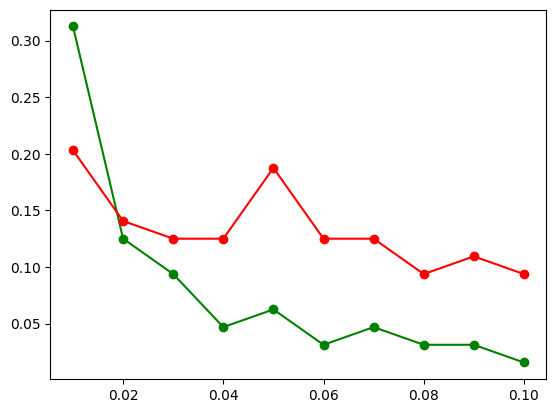

In [40]:
x_points = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
y_points_Apr = Time_Apr
y_points_FPG = Time_FPG

plt.plot(x_points, y_points_Apr, ls='-', c='g', marker='o')
plt.plot(x_points, y_points_FPG, ls='-', c='r', marker='o')
plt.show()

Khi min_sup càng lớn thì thì sẽ giúp ta loại bớt những giá trị không thỏa yêu cầu nhanh hơn và tìm được tập phổ biến cuối cùng nhanh hơn.

- Min_sup càng lớn thì thuật toán Apriori chạy nhanh hơn thuật toán FPGrowth

- Min_sup càng nhỏ thì thuật toán FPGrowth lại chạy nhanh hơn